# BUREAU

In [6]:
import pandas as pd

# 1. Membaca file data pengajuan sebelumnya
df_prev = pd.read_csv('bureau.csv')

# 2. Melihat informasi tentang DataFrame untuk memahami struktur data
print("DataFrame Info:")
print(df_prev.info())

print("\nSample Data (5 baris pertama):")
print(df_prev.head())

print("\nDaftar Kolom:")
print(df_prev.columns.tolist())

# 3. Setelah melihat output di atas, ganti 'NAME_CONTRACT_STATUS' dengan nama kolom yang benar
# Misalnya, jika kolom yang benar adalah 'STATUS' atau 'CONTRACT_STATUS'

# Contoh: Jika kolom yang benar adalah 'STATUS'
# Uncomment dan sesuaikan baris di bawah ini dengan nama kolom yang benar
# correct_column = 'STATUS'  # Ganti dengan nama kolom yang benar dari output di atas

# 4. Setelah menemukan nama kolom yang benar, lakukan analisis
# status_counts = df_prev[correct_column].value_counts()
# print("\nJumlah Pengajuan Berdasarkan Status:")
# print(status_counts)

# status_percentage = df_prev[correct_column].value_counts(normalize=True) * 100
# print("\nPersentase Status Pengajuan:")
# print(status_percentage)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None

Sample Data (5 baris pertama):
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CRE

In [3]:
import pandas as pd

df_prev = pd.read_csv('bureau.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

#DAYS_CREDIT_ENDDATE, batas waktu seharusnya	
#DAYS_ENDDATE_FACT, tanggal lunas faktanya	

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
# Ambil contoh nasabah yang punya AMT_CREDIT_SUM sekitar 91323
sample_data = df_prev[df_prev['AMT_CREDIT_SUM'] == 225000.0	]

# Tampilkan status aktif dan sisa hutangnya
display(sample_data[['SK_ID_CURR', 'CREDIT_ACTIVE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT']])

#debt ratio= amt_credit_sum_debit / amt_credit_sum

,SK_ID_CURR,CREDIT_ACTIVE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
1,215354,Active,225000.0,171342.0
36,400486,Closed,225000.0,0.0
54,389599,Closed,225000.0,0.0
60,242993,Closed,225000.0,0.0
64,242993,Closed,225000.0,0.0
...,...,...,...,...
1716313,121571,Closed,225000.0,0.0
1716323,205698,Closed,225000.0,0.0
1716367,174236,Active,225000.0,0.0
1716377,245087,Closed,225000.0,NaN


In [6]:
import numpy as np

# Membuat fungsi kategori kesegaran data KADALUARSA PA BELOM
def cek_update(days):
    if days >= -90:
        return 'Fresh (Baru)'
    elif days >= -365:
        return 'Mulai Basi'
    else:
        return 'Kedaluwarsa'

# Terapkan ke dataframe
df_prev['UPDATE_STATUS'] = df_prev['DAYS_CREDIT_UPDATE'].apply(cek_update)

# Lihat jumlahnya
print(df_prev['UPDATE_STATUS'].value_counts())

UPDATE_STATUS
Kedaluwarsa     881183
Fresh (Baru)    586021
Mulai Basi      249224
Name: count, dtype: int64


## PREVIOUS APPLICATION

In [8]:
import pandas as pd

df_prev = pd.read_csv('previous_application.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

#AMT_ANNUITY: Jumlah cicilan yang harus dibayar nasabah per bulan pada pinjaman sebelumnya.

#AMT_APPLICATION: Jumlah uang yang diajukan oleh nasabah.

#AMT_CREDIT: Jumlah uang yang akhirnya disetujui oleh bank. (Seringkali berbeda dengan yang diajukan).

#AMT_DOWN_PAYMENT: Uang muka (DP) yang dibayar nasabah.

#AMT_GOODS_PRICE: Harga barang yang dibeli (misal harga asli HP atau motornya).

#WEEKDAY_APPR_PROCESS_START: Hari apa nasabah mengajukan (Senin, Selasa, dll).

#HOUR_APPR_PROCESS_START: Jam berapa nasabah mengajukan.

#NAME_SELLER_INDUSTRY: Jenis toko tempat nasabah beli barang (misal: Toko Elektronik, Dealer Motor, atau Toko Konstruksi).

#CNT_PAYMENT: Tenor pinjaman atau berapa bulan dia mencicil (misal: 12 bulan, 24 bulan).

#NAME_YIELD_GROUP: Penggolongan bunga (misal: high berarti bunganya tinggi, low berarti bunga rendah/promo).

#PRODUCT_COMBINATION: Jenis paket produk yang diambil (misal: "POS industry with interest" atau "Cash Loan").

#DAYS_FIRST_DRAWING: Kapan uangnya cair pertama kali.

#DAYS_FIRST_DUE: Kapan tanggal jatuh tempo cicilan pertama.

#DAYS_LAST_DUE_1ST_VERSION: Tanggal jatuh tempo terakhir yang direncanakan di awal kontrak.

#DAYS_LAST_DUE: Tanggal jatuh tempo cicilan terakhir yang sebenarnya.

#DAYS_TERMINATION: Kapan kontrak benar-benar ditutup secara sistem.

#NFLAG_INSURED_ON_APPROVAL: Apakah nasabah mengambil asuransi saat pengajuan (1 = Ya, 0 = Tidak).

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


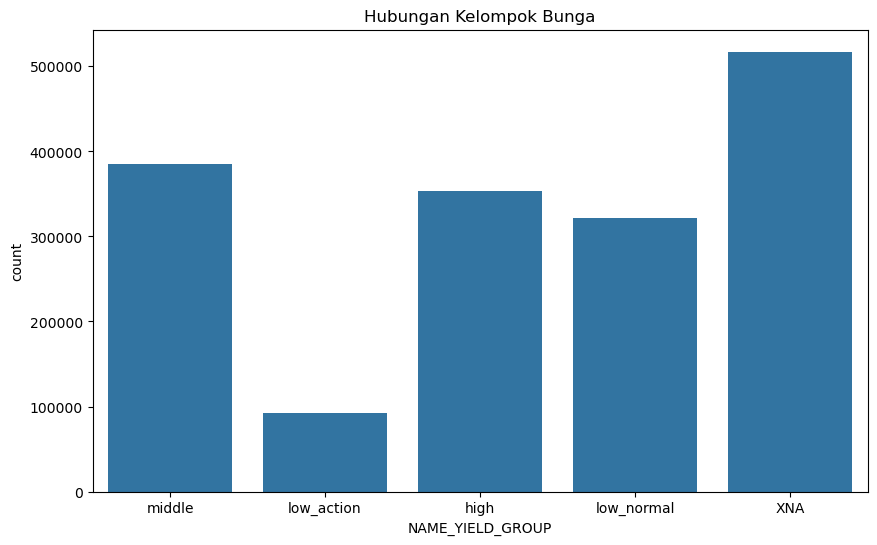

In [10]:
# Gabungkan data bunga dari previous_application dengan target dari application_train
# Misal kita lihat perbandingan bunga vs kegagalan bayar
import seaborn as sns
import matplotlib.pyplot as plt

# First, check what columns are actually available in df_prev
# print(df_prev.columns)

# Then use an existing column for the hue parameter
plt.figure(figsize=(10,6))
sns.countplot(data=df_prev, x='NAME_YIELD_GROUP')  # Removed the non-existent hue parameter
# Alternative: replace 'TARGET_LOKAL' with an actual column name that exists in df_prev
# sns.countplot(data=df_prev, x='NAME_YIELD_GROUP', hue='ACTUAL_COLUMN_NAME')
plt.title('Hubungan Kelompok Bunga')
plt.show()

## SAMPLE_SUBMISSION

In [11]:
import pandas as pd

df_prev = pd.read_csv('sample_submission.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


## INSTALLMENTS_PAYMENTS

In [12]:
import pandas as pd

df_prev = pd.read_csv('installments_payments.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [1]:
# First, create or load the DataFrame
import pandas as pd

# Option 1: Create a new DataFrame (example)
# df_ins = pd.DataFrame({
#     'DAYS_ENTRY_PAYMENT': [...],
#     'DAYS_INSTALMENT': [...],
#     'AMT_INSTALMENT': [...],
#     'AMT_PAYMENT': [...]
# })

# Option 2: Load data from a file (more common)
# Replace 'your_file.csv' with your actual file path
df_ins = pd.read_csv('installments_payments.csv')

# Now you can perform operations on df_ins
# Menghitung selisih hari (telat atau tidak)
# Jika hasilnya positif, berarti telat
df_ins['DAYS_LATE'] = df_ins['DAYS_ENTRY_PAYMENT'] - df_ins['DAYS_INSTALMENT']

# Menghitung selisih uang (kurang bayar atau tidak)
df_ins['PAYMENT_DIFF'] = df_ins['AMT_INSTALMENT'] - df_ins['AMT_PAYMENT']

# Tambahkan ini di baris paling akhir
df_ins[['SK_ID_CURR', 'DAYS_LATE', 'PAYMENT_DIFF']].head()

# Biar tahu rata-rata telatnya berapa hari
print(df_ins[['DAYS_LATE', 'PAYMENT_DIFF']].describe())

          DAYS_LATE  PAYMENT_DIFF
count  1.360250e+07  1.360250e+07
mean  -8.787405e+00 -1.871538e+02
std    2.553990e+01  1.910673e+04
min   -3.189000e+03 -2.630909e+06
25%   -1.400000e+01  0.000000e+00
50%   -6.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    2.884000e+03  2.424726e+06


In [18]:
# 1. Hitung dulu selisih harinya (seperti kodemu sebelumnya)
df_ins['DAYS_LATE'] = df_ins['DAYS_ENTRY_PAYMENT'] - df_ins['DAYS_INSTALMENT']

# 2. Kelompokkan berdasarkan SK_ID_CURR dan ambil rata-rata keterlambatannya
nasabah_telat = df_ins.groupby('SK_ID_CURR')['DAYS_LATE'].mean().reset_index()

# 3. Buat Fungsi untuk Mengkategorikan
def kategori_telat(hari):
    if hari <= 0:
        return 'Sangat Disiplin'
    elif hari <= 7:
        return 'Telat Ringan (1-7 hari)'
    else:
        return 'Tukang Telat (> 7 hari)'

# 4. Terapkan kategori ke data
nasabah_telat['STATUS_PEMBAYAR'] = nasabah_telat['DAYS_LATE'].apply(kategori_telat)

# 5. Tampilkan hasilnya (Output akan muncul!)
display(nasabah_telat.head(10))

,SK_ID_CURR,DAYS_LATE,STATUS_PEMBAYAR
0,100001,-7.285714,Sangat Disiplin
1,100002,-20.421053,Sangat Disiplin
2,100003,-7.160000,Sangat Disiplin
3,100004,-7.666667,Sangat Disiplin
4,100005,-23.555556,Sangat Disiplin
5,100006,-19.375000,Sangat Disiplin
6,100007,-3.636364,Sangat Disiplin
7,100008,26.114286,Tukang Telat (> 7 hari)
8,100009,-8.588235,Sangat Disiplin
9,100010,-11.900000,Sangat Disiplin


In [5]:
import pandas as pd

df_prev = pd.read_csv('credit_card_balance.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [6]:
# 1. Hitung Rasio Pemakaian (Utilization)
# Rumus: Saldo saat ini dibagi Limit yang tersedia
df_prev['UTILIZATION'] = df_prev['AMT_BALANCE'] / (df_prev['AMT_CREDIT_LIMIT_ACTUAL'] + 1)

# 2. Filter nasabah yang pemakaiannya di atas 90% (Mepet Limit)
nasabah_mepet = df_prev[df_prev['UTILIZATION'] > 0.9][['SK_ID_CURR', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'UTILIZATION']]

# 3. Urutkan dari yang paling tinggi pemakaiannya (Overlimit)
nasabah_mepet = nasabah_mepet.sort_values(by='UTILIZATION', ascending=False)

# 4. Tampilkan hasilnya
print("Daftar Nasabah dengan Pemakaian Kartu Kredit di Atas 90%:")
display(nasabah_mepet.head(10))

Daftar Nasabah dengan Pemakaian Kartu Kredit di Atas 90%:


,SK_ID_CURR,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,UTILIZATION
1055010,126798,1139278.410,0,1139278.410
1513489,126798,1136902.095,0,1136902.095
1730326,250789,1125000.000,0,1125000.000
1582595,133483,475435.440,0,475435.440
1981839,133483,464376.555,0,464376.555
2551306,133483,452949.030,0,452949.030
2932046,262650,270000.000,0,270000.000
3378310,221987,270000.000,0,270000.000
1720391,350810,225000.000,0,225000.000
2941119,243842,175097.565,0,175097.565


# APPLICATION TRAIN

In [8]:
# Membaca tabel utama yang ada kolom TARGET-nya
df_app = pd.read_csv('application_train.csv')

# Cek apakah sudah terbaca
print("Tabel Utama Berhasil Dimuat!")
df_app[['SK_ID_CURR', 'TARGET']].head()

Tabel Utama Berhasil Dimuat!


,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [9]:
# 1. Tentukan status limit: 0 atau > 0
df_prev['LIMIT_STATUS'] = df_prev['AMT_CREDIT_LIMIT_ACTUAL'].apply(lambda x: 'Limit 0 (Macet/Blokir)' if x <= 0 else 'Masih Ada Limit')

# 2. Ambil data terbaru per nasabah (supaya tidak duplikat)
latest_cc = df_prev.sort_values('MONTHS_BALANCE').groupby('SK_ID_CURR').last().reset_index()

# 3. Gabungkan dengan tabel utama (asumsi tabel utamamu bernama df_app yang ada kolom TARGET)
# Jika nama tabel utamamu beda, silakan ganti 'df_app'
analysis_df = latest_cc.merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')

# 4. Hitung persentase Gagal Bayar per grup
summary = analysis_df.groupby('LIMIT_STATUS')['TARGET'].mean() * 100

print("Persentase Nasabah Gagal Bayar (TARGET=1) berdasarkan Status Limit:")
print(summary)

Persentase Nasabah Gagal Bayar (TARGET=1) berdasarkan Status Limit:
LIMIT_STATUS
Limit 0 (Macet/Blokir)    7.283956
Masih Ada Limit           9.116510
Name: TARGET, dtype: float64


In [10]:
# 1. Hitung rata-rata penarikan ATM (Cash Drawings) per nasabah
cash_behavior = df_prev.groupby('SK_ID_CURR')['AMT_DRAWINGS_ATM_CURRENT'].mean().reset_index()

# 2. Gabungkan dengan tabel utama untuk melihat TARGET
df_cash = cash_behavior.merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')

# 3. Bandingkan rata-rata tarikan tunai antara nasabah Lancar (0) vs Gagal Bayar (1)
perbandingan_cash = df_cash.groupby('TARGET')['AMT_DRAWINGS_ATM_CURRENT'].mean()

print("Rata-rata Tarik Tunai ATM per Bulan:")
print(perbandingan_cash)

# 0 itu yang nasabah lancar
# 1 itu yang gagal bayar

Rata-rata Tarik Tunai ATM per Bulan:
TARGET
0    11855.467971
1    16197.474972
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64


In [12]:
# 1. Pastikan kita ambil data pekerjaan dan target dari tabel utama
df_info_nasabah = df_app[['SK_ID_CURR', 'OCCUPATION_TYPE', 'TARGET']]

# 2. Gabungkan dengan data tarik tunai (cash_behavior yang tadi sudah dibuat)
# Pastikan variabel 'cash_behavior' sudah ada dari langkah sebelumnya
df_job_analysis = cash_behavior.merge(df_info_nasabah, on='SK_ID_CURR', how='inner')

# 3. Kita kelompokkan berdasarkan jenis pekerjaan
# Kita hitung rata-rata tarik tunai dan rata-rata gagal bayar
hasil_pekerjaan = df_job_analysis.groupby('OCCUPATION_TYPE').agg({
    'AMT_DRAWINGS_ATM_CURRENT': 'mean',
    'TARGET': 'mean'
}).sort_values(by='AMT_DRAWINGS_ATM_CURRENT', ascending=False)

# 4. Percantik tampilan: ubah ke persen dan bulankan angka
hasil_pekerjaan['PERSEN_GAGAL_BAYAR'] = (hasil_pekerjaan['TARGET'] * 100).round(2)
hasil_pekerjaan['RATA_TARIK_TUNAI'] = hasil_pekerjaan['AMT_DRAWINGS_ATM_CURRENT'].round(0)

# Tampilkan kolom yang penting saja
display(hasil_pekerjaan[['RATA_TARIK_TUNAI', 'PERSEN_GAGAL_BAYAR']])

,RATA_TARIK_TUNAI,PERSEN_GAGAL_BAYAR
OCCUPATION_TYPE,,
Realty agents,14775.0,7.50
Private service staff,14044.0,6.76
Low-skill Laborers,13589.0,17.77
Managers,13512.0,6.55
IT staff,13086.0,8.04
Cooking staff,13077.0,10.38
Drivers,12755.0,12.27
HR staff,12752.0,5.66
Sales staff,12718.0,10.40


In [13]:
# 1. Menghitung rata-rata perilaku per nasabah
behavior = df_prev.groupby('SK_ID_CURR').agg({
    'AMT_DRAWINGS_ATM_CURRENT': 'mean',
    'AMT_BALANCE': 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean'
}).reset_index()

# 2. Membuat Kolom Status Perilaku
def klasifikasi_nasabah(row):
    # Jika limitnya 0 tapi punya hutang atau sering tarik tunai
    if row['AMT_CREDIT_LIMIT_ACTUAL'] == 0 and row['AMT_BALANCE'] > 0:
        return 'Gali Lubang (Macet/Limit Dicabut)'
    # Jika tarik tunai ATM rata-rata di atas 10rb (angka ini bisa disesuaikan)
    elif row['AMT_DRAWINGS_ATM_CURRENT'] > 10000:
        return 'Gali Lubang (Tukang Tarik Tunai)'
    else:
        return 'Nasabah Jujur/Sehat'

behavior['SEGMENT_NASABAH'] = behavior.apply(klasifikasi_nasabah, axis=1)

# 3. Gabungkan dengan TARGET untuk melihat hasilnya
df_final = behavior.merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')

# 4. Lihat berapa persen yang beneran Gagal Bayar (TARGET 1)
hasil_segmentasi = df_final.groupby('SEGMENT_NASABAH')['TARGET'].mean() * 100
print(hasil_segmentasi)

SEGMENT_NASABAH
Gali Lubang (Macet/Limit Dicabut)    20.472441
Gali Lubang (Tukang Tarik Tunai)     13.422692
Nasabah Jujur/Sehat                   7.110840
Name: TARGET, dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_10880\2815578227.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment Nasabah', y='Persentase Gagal Bayar (%)', data=plot_data, palette='viridis')


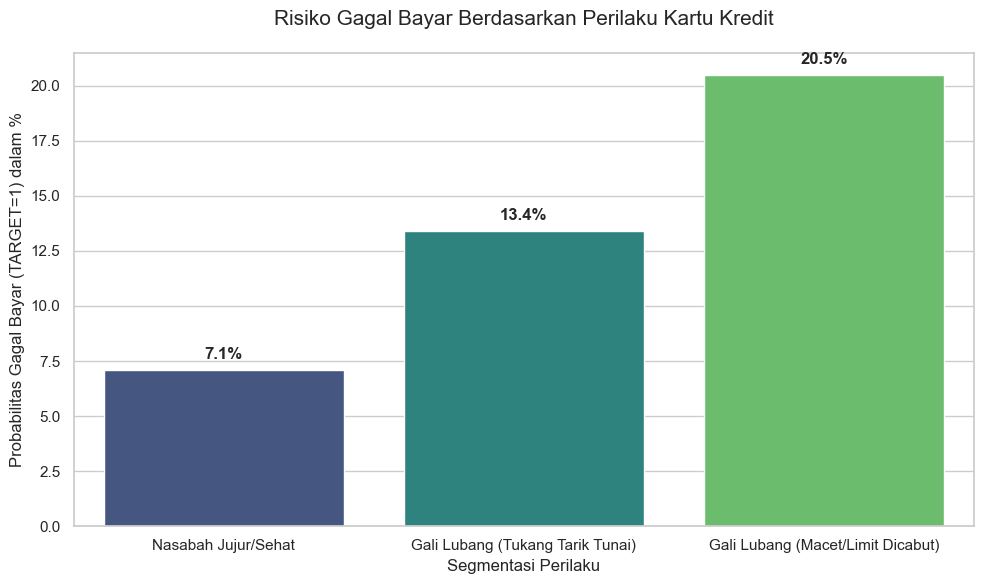

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema visualisasi
sns.set_theme(style="whitegrid")

# Menyiapkan data untuk grafik
plot_data = hasil_segmentasi.sort_values().reset_index()
plot_data.columns = ['Segment Nasabah', 'Persentase Gagal Bayar (%)']

# Membuat Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment Nasabah', y='Persentase Gagal Bayar (%)', data=plot_data, palette='viridis')

# Menambahkan Label dan Judul
plt.title('Risiko Gagal Bayar Berdasarkan Perilaku Kartu Kredit', fontsize=15, pad=20)
plt.ylabel('Probabilitas Gagal Bayar (TARGET=1) dalam %', fontsize=12)
plt.xlabel('Segmentasi Perilaku', fontsize=12)

# Menampilkan Angka di Atas Bar
for index, row in plot_data.iterrows():
    plt.text(index, row['Persentase Gagal Bayar (%)'] + 0.5, 
             f'{row["Persentase Gagal Bayar (%)"]:.1f}%', 
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [15]:
# 1. Hitung rasio pemakaian (utilization) tiap bulan
df_prev['UTILIZATION'] = df_prev['AMT_BALANCE'] / df_prev['AMT_CREDIT_LIMIT_ACTUAL'].replace(0, 1)

# 2. Ambil data 6 bulan terakhir saja untuk melihat tren terbaru
df_recent = df_prev[df_prev['MONTHS_BALANCE'] >= -6]

# 3. Cari pemakaian pertama (awal 6 bulan) dan pemakaian terakhir (bulan terbaru)
util_trend = df_recent.groupby('SK_ID_CURR').agg(
    util_awal=('UTILIZATION', 'first'),
    util_akhir=('UTILIZATION', 'last')
).reset_index()

# 4. Hitung selisih tren (Laju Kecepatan Ngabisin Limit)
util_trend['UTIL_SPEED'] = util_trend['util_akhir'] - util_trend['util_awal']

# 5. Gabungkan dengan TARGET
df_trend_final = util_trend.merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')

# 6. Lihat rata-rata laju pemakaian antara nasabah Lancar vs Gagal Bayar
print("Rata-rata Laju Kecepatan Ngabisin Limit:")
print(df_trend_final.groupby('TARGET')['UTIL_SPEED'].mean())

Rata-rata Laju Kecepatan Ngabisin Limit:
TARGET
0     3.769187
1    14.956807
Name: UTIL_SPEED, dtype: float64


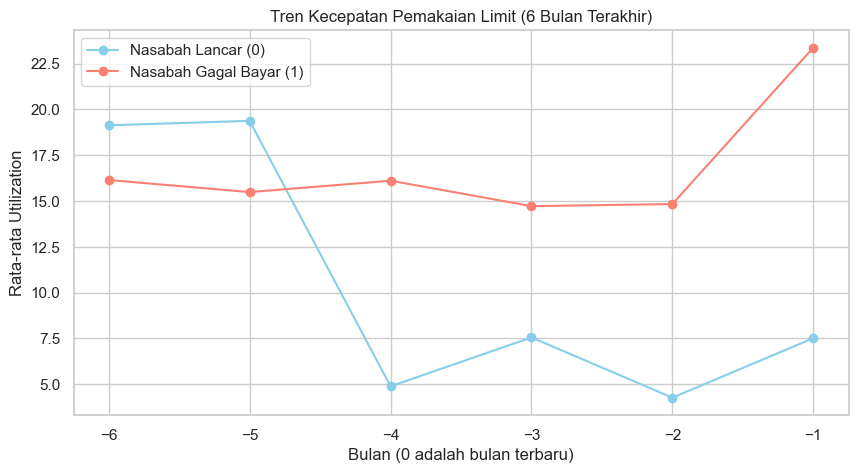

In [16]:
# Ambil rata-rata penggunaan per bulan untuk tiap kelompok target
trend_plot = df_prev[df_prev['MONTHS_BALANCE'] >= -6].merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')
pivot_trend = trend_plot.groupby(['MONTHS_BALANCE', 'TARGET'])['UTILIZATION'].mean().unstack()

# Plotting
pivot_trend.plot(figsize=(10,5), marker='o', color=['skyblue', 'salmon'])
plt.title('Tren Kecepatan Pemakaian Limit (6 Bulan Terakhir)')
plt.xlabel('Bulan (0 adalah bulan terbaru)')
plt.ylabel('Rata-rata Utilization')
plt.legend(['Nasabah Lancar (0)', 'Nasabah Gagal Bayar (1)'])
plt.grid(True)
plt.show()

# CREDIT CARD BALANCE

In [1]:
import pandas as pd

df_prev = pd.read_csv('credit_card_balance.csv')

# Menampilkan 5 baris pertama dalam bentuk tabel
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [6]:
import pandas as pd

# 1. Load data credit card (yang sedang kamu kerjakan)
df_prev = pd.read_csv('credit_card_balance.csv')

# 2. LOAD DATA UTAMA (Ini yang tadi kurang, supaya ada kolom TARGET)
df_app = pd.read_csv('application_train.csv') 

# 3. Hitung rasio pemakaian (utilization)
df_prev['UTIL_RATIO'] = df_prev['AMT_BALANCE'] / df_prev['AMT_CREDIT_LIMIT_ACTUAL'].replace(0, 1)

# 4. Ambil bulan terbaru (-1) dan 3 bulan sebelumnya (-3)
util_latest = df_prev[df_prev['MONTHS_BALANCE'] == -1][['SK_ID_CURR', 'UTIL_RATIO']]
util_prev = df_prev[df_prev['MONTHS_BALANCE'] == -3][['SK_ID_CURR', 'UTIL_RATIO']]

# 5. Gabung dan hitung selisihnya
util_diff = util_latest.merge(util_prev, on='SK_ID_CURR', suffixes=('_now', '_prev'))
util_diff['SPEED'] = util_diff['UTIL_RATIO_now'] - util_diff['UTIL_RATIO_prev']

# 6. GABUNG DENGAN TARGET DARI df_app (Bukan dari df_prev)
# Kita hanya ambil kolom SK_ID_CURR dan TARGET agar ringan
final_speed = util_diff.merge(df_app[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')

# 7. Tampilkan hasil
print("Rata-rata Laju Pengurasan Limit (Semakin tinggi semakin berisiko):")
print(final_speed.groupby('TARGET')['SPEED'].mean())

Rata-rata Laju Pengurasan Limit (Semakin tinggi semakin berisiko):
TARGET
0   -6.138844
1    0.883889
Name: SPEED, dtype: float64


In [7]:
# 1. Pastikan df_app sudah di-load (seperti langkah sebelumnya)
df_target = df_app[['SK_ID_CURR', 'TARGET']]

# 2. Hitung rata-rata tarik tunai per nasabah di data kartu kredit
cash_behavior = df_prev.groupby('SK_ID_CURR')['AMT_DRAWINGS_ATM_CURRENT'].mean().reset_index()

# 3. Gabungkan dengan TARGET
final_cash = cash_behavior.merge(df_target, on='SK_ID_CURR')

# 4. Tampilkan perbandingan
print("Rata-rata Nominal Tarik Tunai ATM:")
print(final_cash.groupby('TARGET')['AMT_DRAWINGS_ATM_CURRENT'].mean())

Rata-rata Nominal Tarik Tunai ATM:
TARGET
0    11855.467971
1    16197.474972
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64


In [8]:
# 1. Filter nasabah yang limitnya 0 tapi masih punya saldo hutang (AMT_BALANCE > 0)
frozen_accounts = df_prev[(df_prev['AMT_CREDIT_LIMIT_ACTUAL'] == 0) & (df_prev['AMT_BALANCE'] > 0)]

# 2. Ambil ID unik nasabah yang masuk kategori ini
frozen_ids = frozen_accounts[['SK_ID_CURR']].drop_duplicates()

# 3. Gabungkan dengan data TARGET
final_frozen = frozen_ids.merge(df_target, on='SK_ID_CURR')

# 4. Hitung persentase gagal bayar di kelompok ini
# (Makin mendekati 100%, berarti indikator ini makin akurat memprediksi kegagalan)
print("Persentase Gagal Bayar pada Nasabah dengan Limit 0:")
print(final_frozen['TARGET'].value_counts(normalize=True) * 100)

Persentase Gagal Bayar pada Nasabah dengan Limit 0:
TARGET
0    89.708141
1    10.291859
Name: proportion, dtype: float64


# BUREAU BALANCE

In [11]:
import pandas as pd

df_prev = pd.read_csv('bureau_balance.csv')

df_prev.head(50)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [13]:
# Menghitung jumlah masing-masing status
status_counts = df_prev['STATUS'].value_counts()

# Menghitung persentasenya juga agar lebih mudah dianalisis
status_pct = df_prev['STATUS'].value_counts(normalize=True) * 100

# Menampilkan hasil
summary_status = pd.DataFrame({
    'Jumlah': status_counts,
    'Persentase (%)': status_pct
})

print("Distribusi Status di Bureau Balance:")
print(summary_status)

Distribusi Status di Bureau Balance:
          Jumlah  Persentase (%)
STATUS                          
C       13646993       49.989123
0        7499507       27.470797
X        5810482       21.283875
1         242347        0.887720
5          62406        0.228594
2          23419        0.085784
3           8924        0.032689
4           5847        0.021418


In [16]:
# Jika df_prev berisi bureau_balance.csv
total_bureau_ids = df_prev['SK_ID_BUREAU'].nunique()
print(f"Total ID Bureau unik: {total_bureau_ids:,}")

Total ID Bureau unik: 817,395


In [17]:
df_app = pd.read_csv('application_train.csv')
total_pendaftar = df_app['SK_ID_CURR'].nunique()
print(f"Total seluruh pelanggan (Pendaftar): {total_pendaftar:,} orang")

Total seluruh pelanggan (Pendaftar): 307,511 orang


In [18]:
df_cc = pd.read_csv('credit_card_balance.csv')
total_cc = df_cc['SK_ID_CURR'].nunique()
print(f"Total pelanggan yang punya Kartu Kredit: {total_cc:,} orang")

Total pelanggan yang punya Kartu Kredit: 103,558 orang


# POS CASH BALANCE

In [45]:
import pandas as pd

df_app = pd.read_csv('application_test.csv')
df_app.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [44]:
import pandas as pd

df_app = pd.read_csv('POS_CASH_balance.csv')
df_app.head(20)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [26]:
# Menghitung berapa banyak transaksi yang telat (DPD > 0)
telat_bayar = df_prev[df_prev['SK_DPD'] > 0]

print(f"Total baris yang tercatat telat bayar: {len(telat_bayar):,} kali")
print(f"Keterlambatan paling lama: {df_prev['SK_DPD'].max()} hari")

# Melihat rata-rata keterlambatan per nasabah
rata_telat = df_prev.groupby('SK_ID_CURR')['SK_DPD'].mean().reset_index()
print("\nRata-rata hari keterlambatan per ID nasabah:")
print(rata_telat.head())

Total baris yang tercatat telat bayar: 295,227 kali
Keterlambatan paling lama: 4231 hari

Rata-rata hari keterlambatan per ID nasabah:
   SK_ID_CURR    SK_DPD
0      100001  0.777778
1      100002  0.000000
2      100003  0.000000
3      100004  0.000000
4      100005  0.000000


In [27]:
# 1. Menghitung jumlah baris yang telat dan tidak
jumlah_telat = (df_prev['SK_DPD'] > 0).sum()
jumlah_lancar = (df_prev['SK_DPD'] == 0).sum()

# 2. Menghitung persentase
total = len(df_prev)
persen_telat = (jumlah_telat / total) * 100
persen_lancar = (jumlah_lancar / total) * 100

print(f"--- ANALISIS KETERLAMBATAN (POS_CASH) ---")
print(f"Jumlah Transaksi Lancar: {jumlah_lancar:,} ({persen_lancar:.2f}%)")
print(f"Jumlah Transaksi Telat: {jumlah_telat:,} ({persen_telat:.2f}%)")

--- ANALISIS KETERLAMBATAN (POS_CASH) ---
Jumlah Transaksi Lancar: 9,706,131 (97.05%)
Jumlah Transaksi Telat: 295,227 (2.95%)


# HOME CREDIT COLUMNS DESC

In [41]:
import pandas as pd

# Add encoding parameter to handle non-UTF-8 characters
df_prev = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin1')  
# You can also try other encodings like 'ISO-8859-1', 'cp1252', or 'latin1'

# Display the first 5 rows as a tabl
df_prev.head(219)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


# EXPLANATION

### application_train
amt_income_total = gaji nasabah

amt_credit = jumlah pinjaman

berdasarkan deskripsi data, faktor gagal bisa dilihat dari perbandingan antara keduanya


### installments_payments
days_installments = kapan harus bayar

days_entry_payment = kapan nasabah sebenarnya bayar

jiks days_entry lebih besar dari days_installment maka nasabah telat, yang bisa menjadi faktor gagal bayar pada nasabah